In [178]:
import numpy as np
from numpy import random as rnd
from matplotlib import pyplot as plt
import warnings,datetime,os,time,math

import torch
import modin.pandas as pd
import seaborn as sns

from itertools import product

from sklearn import preprocessing as pp
import statsmodels.api as sm

import pickle,h5py,json

import urllib
from bs4 import BeautifulSoup
from lmfit import Model as lmmodel

sns.set()

In [14]:
rootpath = '..\\..\\TF_data\\STOCKDATA\\Data\\DJIA\\'

In [94]:
df_dj = pd.read_csv(rootpath+'DJIA\\DJIA.csv',index_col='DATE',parse_dates=['DATE'])

df_dj['DJIA'] = df_dj['DJIA'].apply(lambda x: np.nan if x=='.' else float(x))
df_dj = df_dj.resample('MS').mean()

In [156]:
df = pd.read_csv(rootpath+'DJIA30\\all_stocks_2006-01-01_to_2018-01-01.csv',index_col='Date',parse_dates=['Date'])

df = df[['Open']].reset_index(drop=False).groupby('Date').mean().rename(columns={'Open':'AVG'})
df = df.resample('MS').mean()

In [157]:
date_min = max(df.index.min(),df_dj.index.min())
date_max = min(df.index.max(),df_dj.index.max())

In [158]:
df_dj = df_dj[date_min:date_max]
df = df[date_min:date_max]

In [159]:
for filename in os.listdir(rootpath+'DJIA30\\'):
    if filename.split('_')[0]=='all': continue
    cf = pd.read_csv(rootpath+'DJIA30\\'+filename,index_col='Date',parse_dates=['Date'])
    cf = cf[['Open']].reset_index(drop=False).groupby('Date').mean().rename(columns={'Open':filename.split('_')[0]})
    df[filename.split('_')[0]] = cf.resample('MS').mean()[date_min:date_max]

In [177]:
p = d = q = range(0,2)

In [193]:
pdq = list(product(p,d,q))
seasonal_pdq = [(x[0],x[1],x[2],12) for x in pdq]

In [195]:
r_list = []
for params in pdq:
    for seasonal_params in seasonal_pdq:
        model = sm.tsa.statespace.SARIMAX(df_dj,
                                          order=params,
                                          seasonal_order=seasonal_params,
                                          enforce_stationarity=False,
                                          enforce_invertibility=False)
        result = model.fit()
        r_list.append([params,seasonal_params,result.aic])
        print('{}x{} -> AIC={}'.format(params,seasonal_params,result.aic))

(0, 0, 0)x(0, 0, 0, 12) -> AIC=2067.7215095475635


(0, 0, 0)x(0, 0, 1, 12) -> AIC=1812.3031447625106
(0, 0, 0)x(0, 1, 0, 12) -> AIC=1467.8264467988997
(0, 0, 0)x(0, 1, 1, 12) -> AIC=1253.4729781134147
(0, 0, 0)x(1, 0, 0, 12) -> AIC=1412.8510850123178
(0, 0, 0)x(1, 0, 1, 12) -> AIC=1400.0873782724098
(0, 0, 0)x(1, 1, 0, 12) -> AIC=1261.0171444574974
(0, 0, 0)x(1, 1, 1, 12) -> AIC=1228.1412463740915
(0, 0, 1)x(0, 0, 0, 12) -> AIC=1982.25018271602
(0, 0, 1)x(0, 0, 1, 12) -> AIC=3500.842027462885
(0, 0, 1)x(0, 1, 0, 12) -> AIC=1363.8373531316322
(0, 0, 1)x(0, 1, 1, 12) -> AIC=1165.008409961793
(0, 0, 1)x(1, 0, 0, 12) -> AIC=1349.792546983312
(0, 0, 1)x(1, 0, 1, 12) -> AIC=1310.2612889658972
(0, 0, 1)x(1, 1, 0, 12) -> AIC=1195.7581331746062
(0, 0, 1)x(1, 1, 1, 12) -> AIC=1136.1641175760349
(0, 1, 0)x(0, 0, 0, 12) -> AIC=1380.3100059558321
(0, 1, 0)x(0, 0, 1, 12) -> AIC=1206.5496196968525
(0, 1, 0)x(0, 1, 0, 12) -> AIC=1241.958139471949
(0, 1, 0)x(0, 1, 1, 12) -> AIC=1026.5212980668025
(0, 1, 0)x(1, 0, 0, 12) -> AIC=1220.073161038972
(0, 1, 

(1, 0, 1)x(1, 1, 1, 12) -> AIC=1031.428296232661
(1, 1, 0)x(0, 0, 0, 12) -> AIC=1376.6718512993166
(1, 1, 0)x(0, 0, 1, 12) -> AIC=1204.336436444457
(1, 1, 0)x(0, 1, 0, 12) -> AIC=1242.2987365889044
(1, 1, 0)x(0, 1, 1, 12) -> AIC=1026.8133418834157
(1, 1, 0)x(1, 0, 0, 12) -> AIC=1203.6150820666167
(1, 1, 0)x(1, 0, 1, 12) -> AIC=1203.2167515589626
(1, 1, 0)x(1, 1, 0, 12) -> AIC=1032.209479148945
(1, 1, 0)x(1, 1, 1, 12) -> AIC=1028.0075346309404
(1, 1, 1)x(0, 0, 0, 12) -> AIC=1362.398627121741
(1, 1, 1)x(0, 0, 1, 12) -> AIC=1192.0397487739338
(1, 1, 1)x(0, 1, 0, 12) -> AIC=1226.7956625183897
(1, 1, 1)x(0, 1, 1, 12) -> AIC=1013.7684148046985
(1, 1, 1)x(1, 0, 0, 12) -> AIC=1205.2663408211588
(1, 1, 1)x(1, 0, 1, 12) -> AIC=1190.1828535863185
(1, 1, 1)x(1, 1, 0, 12) -> AIC=1033.73282219592
(1, 1, 1)x(1, 1, 1, 12) -> AIC=1015.0339596927186


In [201]:
optimal_params = r_list[np.argmin(np.array(r_list)[:,2])]

In [202]:
model = sm.tsa.statespace.SARIMAX(df_dj,
                                  order=optimal_params[0],
                                  seasonal_order=optimal_params[1],
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)
result = model.fit()

In [203]:
result.aic

1011.9420040591943

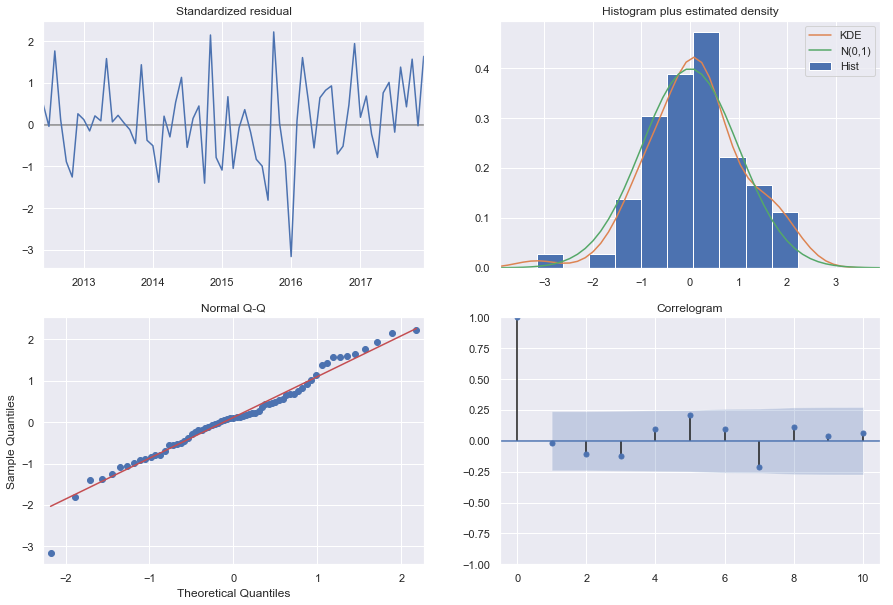

In [207]:
result.plot_diagnostics(figsize=(15,10))
plt.show()

In [235]:
pred = result.get_prediction(start=pd.to_datetime('2016-01-01'),dynamic=False)
pred_ci = pred.conf_int()

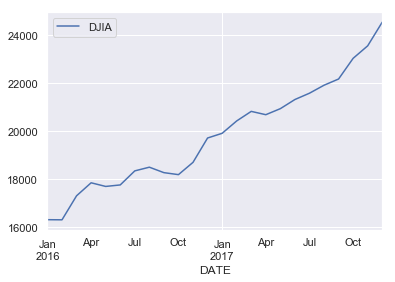

In [241]:
ax = df_dj[pd.to_datetime('2016-01-01'):].plot(label='Observed')

In [242]:
pred.predicted_mean.plot(ax=ax)